# ***API (Application Programming Interface)***

Vivimos en un mundo donde todos están interconectados entre ellos, donde en pocos segundos conseguimos mandar un mensaje a una persona que está incluso a miles de kilómetros y donde, cómodamente desde la cama con nuestro smartphone, podríamos incluso programar encender la máquina del café; pero ¿cómo ocurre esta conexión?

¿Cómo permiten esto los diferentes dispositivos (tablet, pc, smartphone) y las aplicaciones? 

Concretamente, ¿cómo conseguimos hacer todas estas operaciones?

El héroe silencioso y poco citado que te permite hacer todo esto son las Application Programming Interface o mejor conocidas como API. 

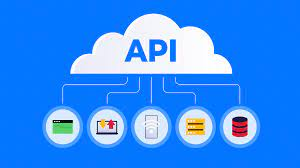

Las APIs (Application Programming Interfaces) son un conjunto de reglas y protocolos que permiten la comunicación entre diferentes aplicaciones y sistemas. Las APIs facilitan la obtención y el intercambio de información entre aplicaciones sin necesidad de conocer los detalles de implementación de cada una de ellas.

![API](https://blog.finerioconnect.com/wp-content/uploads/2020/04/como-funciona-una-api.jpg)

![API](https://media.geeksforgeeks.org/wp-content/uploads/20230216170349/What-is-an-API.png)

## API y las API REST

Por lo general, la API sigue el formato de aplicación a aplicación, mientras que REST (Representational State Transfer que podríamos traducir como transferencia del estado) sigue una estructura diferente: Cliente-Servidor. El cliente y el servidor están evolucionando de forma independiente, proporcionando más flexibilidad en el trabajo.

API de aplicación a aplicación:
Cuando nos referimos a una API en general, nos referimos a un conjunto de reglas y protocolos que permiten la comunicación entre diferentes aplicaciones. En este caso, la comunicación es de aplicación a aplicación, lo que significa que una aplicación solicita información o servicios a otra aplicación.

Un ejemplo de API de aplicación a aplicación es la API de Twitter. Esta API permite a los desarrolladores interactuar con la plataforma de Twitter para realizar acciones como publicar tweets, acceder a tweets publicados, buscar usuarios, entre otros. En este caso, una aplicación (por ejemplo, una aplicación de análisis de redes sociales) se comunica directamente con la aplicación de Twitter a través de su API.



Arquitectura REST (Cliente-Servidor):
REST (Representational State Transfer) es un estilo de arquitectura que se utiliza comúnmente en la implementación de servicios web. En una arquitectura REST, se sigue un patrón de Cliente-Servidor. El cliente (generalmente una aplicación web, móvil o de escritorio) realiza solicitudes a un servidor que proporciona recursos y servicios. El cliente y el servidor evolucionan de forma independiente, lo que permite mayor flexibilidad en el desarrollo y mantenimiento de cada uno de ellos.

Un ejemplo de arquitectura REST es la API de OpenWeatherMap. OpenWeatherMap proporciona datos meteorológicos a través de una API RESTful. Un cliente (por ejemplo, una aplicación móvil del tiempo) realiza solicitudes a la API de OpenWeatherMap utilizando el protocolo HTTP, y el servidor de OpenWeatherMap responde con los datos meteorológicos solicitados.

_________

Para interactuar con una API, generalmente necesitarás realizar solicitudes HTTP. Python tiene una biblioteca popular llamada requests que facilita la realización de solicitudes HTTP. Primero, asegúrate de instalar la biblioteca requests ejecutando:

In [ ]:
# !pip install requests 

Para realizar una solicitud HTTP, puedes utilizar los métodos proporcionados por requests, como ``get``, ``post``, ``put`` y ``delete``. Por ejemplo, si deseas obtener datos de una API mediante una solicitud ``GET``, puedes hacer lo siguiente:

``MÉTODO POST``

Se usa comúnmente para comunicar al servidor la finalización de una operación específica, por ejemplo, para activar el desencadenador de otros scripts. Si es necesario, puede contener un paquete de información para pasar al servidor.

A menudo se usa mucho en lugar del método PUT para actualizar datos.

``MÉTODO GET``

Es el método que el buscador aplica de default para cada una de nuestras peticiones, para entendernos, cuando navegamos en un sitio web o hacemos clic en un enlace estamos efectuando una GET hacia ese recurso.

``MÉTODO PUT``

Según los principios REST tendría que ser usado para crear o actualizar un dato. Por ejemplo si llamáramos PUT/blog/artículo-2 estamos comunicando al server querer crear un nuevo artículo, llamado artículo-2.

``MÉTODO DELETE``

Es el contrario del PUT, se invoca cuando desea eliminar un recurso del servidor.

In [12]:
import requests

url = 'https://as.com'
response = requests.get(url)

In [13]:
response

<Response [200]>

La variable response contendrá la respuesta HTTP, incluyendo el código de estado y los datos devueltos por la API. Puedes verificar el código de estado con response.status_code y acceder a los datos de la respuesta con response.json() si la API devuelve datos en formato JSON.

Una vez que hayas obtenido los datos de la API, es posible que desees manipularlos, analizarlos o almacenarlos en un formato estructurado. Pandas es una biblioteca popular de Python para el análisis y la manipulación de datos.

Supongamos que la API devuelve datos en formato JSON con una estructura similar a esta:

```
  {"datos": [
    {"id": 1, "nombre": "Juan", "edad": 33},
    {"id": 2, "nombre": "Carla", "edad": 23},
    {"id": 3, "nombre": "Manuel", "edad": 57}
  ]}
```

Después de realizar la solicitud y obtener la respuesta en formato JSON, puedes convertir los datos en un DataFrame de Pandas:

In [14]:
import pandas as pd
data = response.json()
df = pd.DataFrame(data['data'])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

--------------

## Ejemplo Practico:

### POKEAPI

Para este ejmeplo vamos a utilizar la API [POKEAPI](https://pokeapi.co/)

Lo primero que tenemos que hacer antes de `"atacar"` una API es leer la documentacion para saber que parametros utiliza y que informacion puedo obtener

Ya leido la documentacion podemos empezar a `"atacar"` la API para crear una DataFrame y poder hacer nuestro analisis de datos

Lo podemos dividir en 4 pasos:

Pado 1: Obtener nombres e ID de Pokémon y guardar en DataFrame

In [15]:
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Paso 1: Obtener la lista de todos los Pokémon
url = "https://pokeapi.co/api/v2/pokemon?limit=50"
response = requests.get(url)
data = response.json()

# Crear una lista de diccionarios con el nombre y la URL de cada Pokémon
pokemon_list = [{"name": pokemon["name"], "url": pokemon["url"]} for pokemon in data["results"]]

pokemon_df = pd.DataFrame(pokemon_list)
pokemon_df

,name,url
0,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/
1,ivysaur,https://pokeapi.co/api/v2/pokemon/2/
2,venusaur,https://pokeapi.co/api/v2/pokemon/3/
3,charmander,https://pokeapi.co/api/v2/pokemon/4/
4,charmeleon,https://pokeapi.co/api/v2/pokemon/5/
5,charizard,https://pokeapi.co/api/v2/pokemon/6/
6,squirtle,https://pokeapi.co/api/v2/pokemon/7/
7,wartortle,https://pokeapi.co/api/v2/pokemon/8/
8,blastoise,https://pokeapi.co/api/v2/pokemon/9/
9,caterpie,https://pokeapi.co/api/v2/pokemon/10/


Esta parte del código crea un DataFrame con los nombres e ID de los Pokémon.

Paso 2: Extraer tipos y habilidades de cada Pokémon y agregarlos al DataFrame

In [83]:
def get_pokemon_details(pokemon_url):
    response = requests.get(pokemon_url)
    pokemon_data = response.json()
     
    types = [t["type"]["name"] for t in pokemon_data["types"]]
    abilities = [a["ability"]["name"] for a in pokemon_data["abilities"]]
    
    return types, abilities

pokemon_df["types"] = None
pokemon_df["abilities"] = None

for index, row in pokemon_df.iterrows():
    pokemon_url = row["url"]
    types, abilities = get_pokemon_details(pokemon_url)
    
    pokemon_df.at[index, "types"] = ", ".join(types)
    pokemon_df.at[index, "abilities"] = ", ".join(abilities)

pokemon_df

,name,url,types,abilities
0,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/,"grass, poison","overgrow, chlorophyll"
1,ivysaur,https://pokeapi.co/api/v2/pokemon/2/,"grass, poison","overgrow, chlorophyll"
2,venusaur,https://pokeapi.co/api/v2/pokemon/3/,"grass, poison","overgrow, chlorophyll"
3,charmander,https://pokeapi.co/api/v2/pokemon/4/,fire,"blaze, solar-power"
4,charmeleon,https://pokeapi.co/api/v2/pokemon/5/,fire,"blaze, solar-power"
5,charizard,https://pokeapi.co/api/v2/pokemon/6/,"fire, flying","blaze, solar-power"
6,squirtle,https://pokeapi.co/api/v2/pokemon/7/,water,"torrent, rain-dish"
7,wartortle,https://pokeapi.co/api/v2/pokemon/8/,water,"torrent, rain-dish"
8,blastoise,https://pokeapi.co/api/v2/pokemon/9/,water,"torrent, rain-dish"
9,caterpie,https://pokeapi.co/api/v2/pokemon/10/,bug,"shield-dust, run-away"


Esta parte del código agrega las columnas 'types' y 'abilities' al DataFrame existente y llena cada fila con la información correspondiente. 

Paso 3: Extraer estadísticas base de cada Pokémon y agregarlas al DataFrame

In [9]:
def get_base_stats(pokemon_data):
    base_stats = {}
    
    for stat in pokemon_data["stats"]:
        stat_name = stat["stat"]["name"]
        base_value = stat["base_stat"]
        base_stats[stat_name] = base_value
    
    return base_stats

stat_columns = ["hp", "attack", "defense", "special-attack", "special-defense", "speed"]

for column in stat_columns:
    pokemon_df[column] = None

for index, row in pokemon_df.iterrows():
    pokemon_url = row["url"]
    response = requests.get(pokemon_url)
    pokemon_data = response.json()
    
    base_stats = get_base_stats(pokemon_data)
    
    for stat, value in base_stats.items():
        pokemon_df.at[index, stat] = value

pokemon_df.head()

,name,url,types,abilities,hp,attack,defense,special-attack,special-defense,speed
0,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/,"grass, poison","overgrow, chlorophyll",45,49,49,65,65,45
1,ivysaur,https://pokeapi.co/api/v2/pokemon/2/,"grass, poison","overgrow, chlorophyll",60,62,63,80,80,60
2,venusaur,https://pokeapi.co/api/v2/pokemon/3/,"grass, poison","overgrow, chlorophyll",80,82,83,100,100,80
3,charmander,https://pokeapi.co/api/v2/pokemon/4/,fire,"blaze, solar-power",39,52,43,60,50,65
4,charmeleon,https://pokeapi.co/api/v2/pokemon/5/,fire,"blaze, solar-power",58,64,58,80,65,80


In [32]:
def get_species_details(species_data):
    is_legendary = species_data["is_legendary"]
    generation = species_data["generation"]["name"]
    return is_legendary, generation

def get_hidden_ability(pokemon_data):
    hidden_ability = None
    for ability in pokemon_data["abilities"]:
        if ability["is_hidden"]:
            hidden_ability = ability["ability"]["name"]
            break
    return hidden_ability

def get_primary_type(pokemon_data):
    primary_type = pokemon_data["types"][0]["type"]["name"]
    return primary_type

def get_weight_and_height(pokemon_data):
    weight = pokemon_data["weight"]
    height = pokemon_data["height"]
    return weight, height


# Agregar las columnas 'is_legendary', 'generation', 'hidden_ability' y 'primary_type' al DataFrame
pokemon_df["is_legendary"] = None
pokemon_df["generation"] = None
pokemon_df["hidden_ability"] = None
pokemon_df["primary_type"] = None
pokemon_df["weight"] = None
pokemon_df["height"] = None

# Completar las columnas 'is_legendary', 'generation', 'hidden_ability' y 'primary_type' con los valores reales
for index, row in pokemon_df.iterrows():
    pokemon_url = row["url"]
    response = requests.get(pokemon_url)
    pokemon_data = response.json()
    
    species_url = pokemon_data["species"]["url"]
    species_response = requests.get(species_url)
    species_data = species_response.json()
    
    is_legendary, generation = get_species_details(species_data)
    hidden_ability = get_hidden_ability(pokemon_data)
    primary_type = get_primary_type(pokemon_data)
    weight, height = get_weight_and_height(pokemon_data)
    
    pokemon_df.at[index, "is_legendary"] = is_legendary
    pokemon_df.at[index, "generation"] = generation
    pokemon_df.at[index, "hidden_ability"] = hidden_ability
    pokemon_df.at[index, "primary_type"] = primary_type
    pokemon_df.at[index, "weight"] = weight
    pokemon_df.at[index, "height"] = height

pokemon_df.head()



,name,url,types,abilities,hp,attack,defense,special-attack,special-defense,speed,is_legendary,generation,hidden_ability,primary_type,main_type,total_stats,weight,height
0,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/,"grass, poison","overgrow, chlorophyll",45,49,49,65,65,45,False,generation-i,chlorophyll,grass,grass,318,69,7
1,ivysaur,https://pokeapi.co/api/v2/pokemon/2/,"grass, poison","overgrow, chlorophyll",60,62,63,80,80,60,False,generation-i,chlorophyll,grass,grass,405,130,10
2,venusaur,https://pokeapi.co/api/v2/pokemon/3/,"grass, poison","overgrow, chlorophyll",80,82,83,100,100,80,False,generation-i,chlorophyll,grass,grass,525,1000,20
3,charmander,https://pokeapi.co/api/v2/pokemon/4/,fire,"blaze, solar-power",39,52,43,60,50,65,False,generation-i,solar-power,fire,fire,309,85,6
4,charmeleon,https://pokeapi.co/api/v2/pokemon/5/,fire,"blaze, solar-power",58,64,58,80,65,80,False,generation-i,solar-power,fire,fire,405,190,11


Esta parte del código agrega las columnas de estadísticas base al DataFrame existente y llena cada fila con la información correspondiente.

Paso 4: Guardar el DataFrame en un archivo CSV y, opcionalmente, en una base de datos SQLite

In [12]:
# Guardar el DataFrame en un archivo CSV
csv_output_file = "pokemon_data.csv"
pokemon_df.to_csv(csv_output_file, index=False)
print(f"Archivo CSV guardado como: {csv_output_file}")

Archivo CSV guardado como: pokemon_data.csv


In [ ]:
import os
import sqlite3

# Opcional: Guardar el DataFrame en una base de datos SQLite
sqlite_output_file = "pokemon_data.db"

if not os.path.exists(sqlite_output_file):
    conn = sqlite3.connect(sqlite_output_file)
    cursor = conn.cursor()
    
    pokemon_df.to_sql("pokemon", conn, if_exists="replace", index=False)
    conn.commit()
    
    print(f"Base de datos SQLite guardada como: {sqlite_output_file}")
    
    conn.close()